***Consider an HR department trying to hire someone and they are trying to predict previous salary of an employer.***

- Consider the data [Position_Salary.csv](Position_Salaries.csv)

***Importing Libraries***

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Importing the dataset***

In [39]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values #only takes the second colum
y = dataset.iloc[:,-1].values
print(f'{x}\n{y}')

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


***Training the Linear Regression model on the whole data***


In [40]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

***Training the polynomial Regression model on the whole dataset***

In [41]:
# create a matrix of exponentiated features i.e. containing x1, x1^2,...x^n
# create a linear regressor object to integrate the exponentiated features into the linear regressor

from sklearn.preprocessing import PolynomialFeatures
poly_ft = PolynomialFeatures(degree =4)
#transform the matrix of the column levels to have  exponentiated features
x_poly = poly_ft.fit_transform(x)
print(x_poly)

#build a linear regressor model to utilise the exponentiated features
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly, y)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


LinearRegression()

***Visualising the Linear Regression Results***

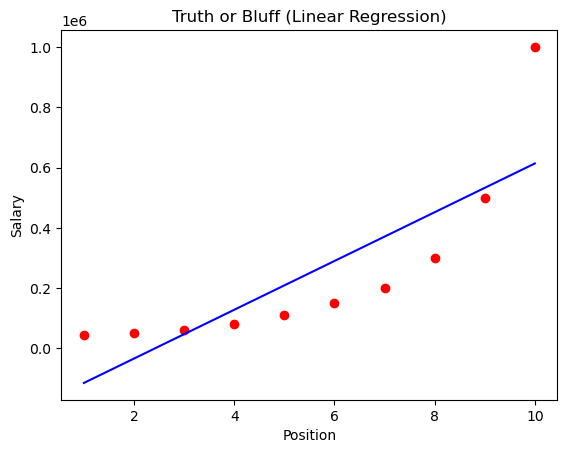

In [42]:
plt.scatter(x,y, color='red') # display the real results i.e. real positions and real salaries
plt.plot(x, lin_reg.predict(x), color="blue")#plot the predictions
plt.title ('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

- red points are the real salaries
- Blue line is the regression line
- It is evident that the linear regression model is not well adapted to the dataset as the predictions are far from the real result.

***Visualising the Polynomial Regression Results***

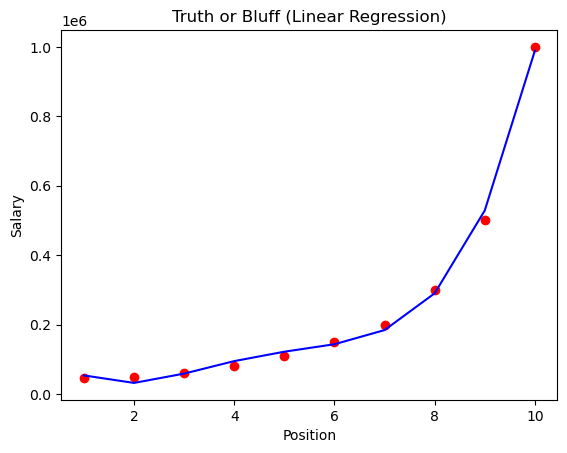

In [43]:
plt.scatter(x,y, color='red') # display the real results i.e. real positions and real salaries
plt.plot(x, lin_reg2.predict(poly_ft.fit_transform(x)), color="blue")#plot the predictions
plt.title ('Truth or Bluff (Linear Regression)')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

- The issue with linear regression is resolved with n =2
- increasing the degree will fine tune the mode but may lead to over fitting

***Visualising the Linear Regression Results (for higher resolution and smoother curve)***

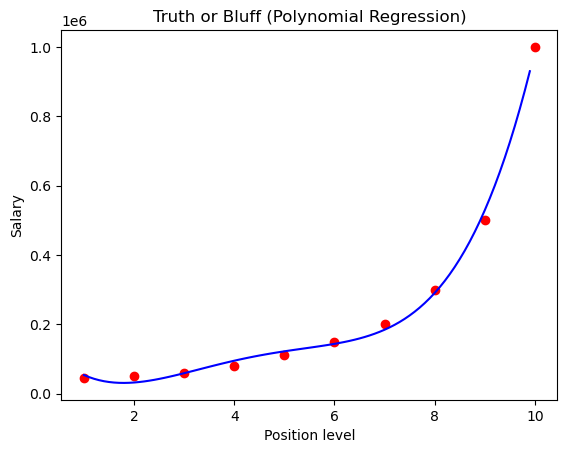

In [45]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))
plt.scatter(x,y,color='red')
plt.plot(x_grid, lin_reg2.predict(poly_ft.fit_transform(x_grid)), color='blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

- trick to a smoother curve is to increase the density of the values on the x axis i.e. instead of 1, we take 1.1, 1.2, 1.3 etc because of the 0.1 step in line 1

***Predicting a new result with Linear Regression***

In [47]:
lin_reg.predict([[6.5]]) # predicting using linear regression 

array([330378.78787879])

- prediction with linear regression is way out

***Predicting a new result with Linear Polynomial Regression***

- Since we have a polynomial regressor model with a degree of 4 the model must be fitted with values as follows:

x1, x1^2, x1^3 and x1^4 

to satisfy the equation for polynomial regression below:

![Polynomial Regression Equation](polyRegreEquation.png)

- this is already achieved by this code: "***poly_ft.fit_transform(x)***" entering the value in a 2d array

In [49]:
lin_reg2.predict(poly_ft.fit_transform([[6.5]]))

array([158862.45265153])